In [1]:
!pwd

/Users/earl/satellite_maps_training


In [8]:
input_path = '/Users/earl/Desktop/satellite_data/'

import os
os.listdir(input_path)

['dt_global_allsat_msla_h_y2018_m01.nc.gz',
 'lsmask.nc',
 'dt_global_allsat_msla_h_y2018_m03.nc.gz',
 'dt_global_allsat_msla_h_y2018_m07.nc.gz',
 'dt_global_allsat_msla_h_y2018_m05.nc.gz',
 'dt_global_allsat_msla_h_y2018_m02.nc.gz',
 'dt_global_allsat_msla_h_y2018_m04.nc.gz',
 'dt_global_allsat_msla_h_y2018_m06.nc.gz',
 'dt_global_allsat_msla_h_y2018_m11.nc.gz',
 'dt_global_allsat_msla_h_y2018_m08.nc.gz',
 'dt_global_allsat_msla_h_y2018_m10.nc.gz',
 'sst.mnmean.nc',
 'dt_global_allsat_msla_h_y2018_m09.nc.gz',
 'dt_global_allsat_msla_h_y2018_m12.nc.gz']

In [3]:
import xarray as xr

data = xr.open_dataset(input_path + 'sst.mnmean.nc')
data

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 447)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2019-02-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

In [4]:
sst = data.sst
sst

<xarray.DataArray 'sst' (time: 447, lat: 180, lon: 360)>
[28965600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2019-02-01
Attributes:
    long_name:             Monthly Mean of Sea Surface Temperature
    unpacked_valid_range:  [-5. 40.]
    actual_range:          [-1.7999996 35.56862  ]
    units:                 degC
    precision:             2
    var_desc:              Sea Surface Temperature
    dataset:               NOAA Optimum Interpolation (OI) SST V2
    level_desc:            Surface
    statistic:             Mean
    parent_stat:           Weekly Mean
    standard_name:         sea_surface_temperature
    cell_methods:          time: mean (monthly from weekly values interpolate...
    valid_range:           [-500 4000]

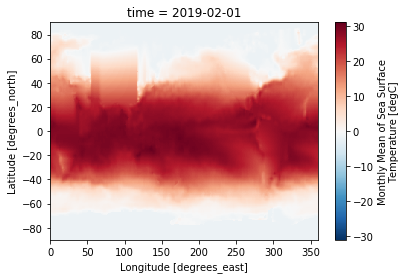

In [24]:
sst.sel(time='2019-02-01').plot()
# sst.isel(time=-1).plot()

In [9]:
mask = xr.open_dataset(input_path + 'lsmask.nc').mask
mask

<xarray.DataArray 'mask' (time: 1, lat: 180, lon: 360)>
array([[[1., 1., ..., 1., 1.],
        [1., 1., ..., 1., 1.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1981-10-29
Attributes:
    long_name:    Land Sea Mask
    valid_range:  [0 1]
    units:        none
    dataset:      NOAA Optimum Interpolation (OI) SST V2
    var_desc:     Land-sea mask
    level_desc:   Surface
    statistic:    Other

In [25]:
mask_squeezed = mask.squeeze()
mask_squeezed

<xarray.DataArray 'mask' (lat: 180, lon: 360)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
    time     datetime64[ns] 1981-10-29
Attributes:
    long_name:    Land Sea Mask
    valid_range:  [0 1]
    units:        none
    dataset:      NOAA Optimum Interpolation (OI) SST V2
    var_desc:     Land-sea mask
    level_desc:   Surface
    statistic:    Other

In [17]:
import numpy as np

sst_masked = sst.where(mask_squeezed==1, np.nan)
print(sst_masked)

<xarray.DataArray 'sst' (time: 447, lat: 180, lon: 360)>
array([[[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       ...,

       [[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5

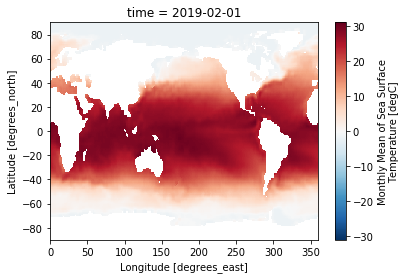

In [26]:
sst_masked.isel(time=-1).plot()

In [28]:
sst_masked.time.values

array(['1981-12-01T00:00:00.000000000', '1982-01-01T00:00:00.000000000',
       '1982-02-01T00:00:00.000000000', '1982-03-01T00:00:00.000000000',
       '1982-04-01T00:00:00.000000000', '1982-05-01T00:00:00.000000000',
       '1982-06-01T00:00:00.000000000', '1982-07-01T00:00:00.000000000',
       '1982-08-01T00:00:00.000000000', '1982-09-01T00:00:00.000000000',
       '1982-10-01T00:00:00.000000000', '1982-11-01T00:00:00.000000000',
       '1982-12-01T00:00:00.000000000', '1983-01-01T00:00:00.000000000',
       '1983-02-01T00:00:00.000000000', '1983-03-01T00:00:00.000000000',
       '1983-04-01T00:00:00.000000000', '1983-05-01T00:00:00.000000000',
       '1983-06-01T00:00:00.000000000', '1983-07-01T00:00:00.000000000',
       '1983-08-01T00:00:00.000000000', '1983-09-01T00:00:00.000000000',
       '1983-10-01T00:00:00.000000000', '1983-11-01T00:00:00.000000000',
       '1983-12-01T00:00:00.000000000', '1984-01-01T00:00:00.000000000',
       '1984-02-01T00:00:00.000000000', '1984-03-01

In [29]:
sst_1982_2018 = sst_masked.sel(time=slice('1982-01-01', '2018-12-01'))
sst_1982_2018

<xarray.DataArray 'sst' (time: 444, lat: 180, lon: 360)>
array([[[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       ...,

       [[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5

In [31]:
sst_1982_2018_clim = sst_1982_2018.groupby('time.month').mean('time')
sst_1982_2018_clim

/Users/earl/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (month: 12, lat: 180, lon: 360)>
array([[[-1.790001, -1.790001, ..., -1.790001, -1.790001],
        [-1.790001, -1.790001, ..., -1.790001, -1.790001],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[-1.790001, -1.790001, ..., -1.790001, -1.790001],
        [-1.790001, -1.790001, ..., -1.790001, -1.790001],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[-1.790001, -1.790001, ..., -1.790001, -1.790001],
        [-1.790001, -1.790001, ..., -1.790001, -1.790001],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[-1.790001, -1.790001, ..., -1.790001, -1.790001],
        [-1.790001, -1.790001, ..., -1.790001, -1.790001],
        ...,
        [      nan,       nan, ...,       nan,

/Users/earl/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


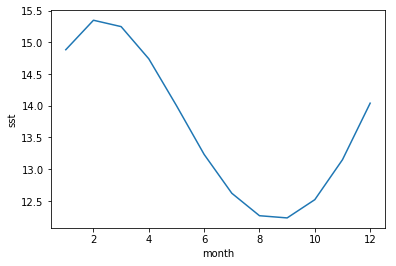

In [36]:
sst_1982_2018_clim.sel(lat=slice(-90,0,-1)).mean('lon').mean('lat').plot()

In [37]:
sst_annual_means = sst_1982_2018.groupby('time.year').mean('time')
sst_annual_means

/Users/earl/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'sst' (year: 37, lat: 180, lon: 360)>
array([[[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       ...,

       [[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]],

       [[-1.79, -1.79, ..., -1.79, -1.79],
        [-1.79, -1.79, ..., -1.79, -1.79],
        ...,
        [  nan,   nan, ...,   nan,   nan],
        [  nan,   nan, ...,   nan,   nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 

/Users/earl/miniconda3/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


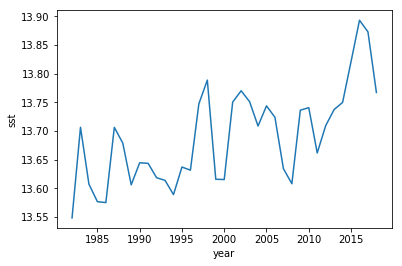

In [39]:
sst_SH = sst_annual_means.sel(lat=slice(-90,0,-1)).mean('lon').mean('lat')
sst_SH.plot()

In [43]:
sst_SH

<xarray.DataArray 'sst' (year: 37)>
array([13.54842 , 13.706548, 13.607242, 13.576734, 13.575166, 13.706452,
       13.679053, 13.606155, 13.644643, 13.643647, 13.618528, 13.613948,
       13.58916 , 13.637212, 13.631726, 13.747504, 13.788904, 13.615854,
       13.615405, 13.750508, 13.770318, 13.751289, 13.708773, 13.743964,
       13.723909, 13.634439, 13.608049, 13.736391, 13.740791, 13.661736,
       13.709353, 13.737615, 13.749925, 13.821169, 13.893376, 13.873088,
       13.767281], dtype=float32)
Coordinates:
  * year     (year) int64 1982 1983 1984 1985 1986 ... 2014 2015 2016 2017 2018

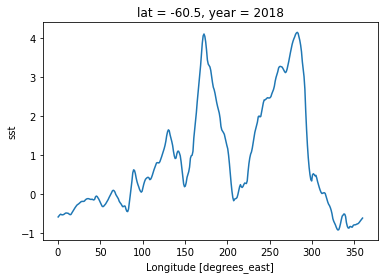

In [62]:
sst_annual_means.sel(lat=-60.1, method='nearest').sel(year=2018).plot()

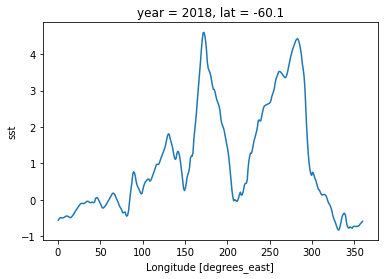

In [63]:
sst_annual_means.interp(lat=-60.1).sel(year=2018).plot()

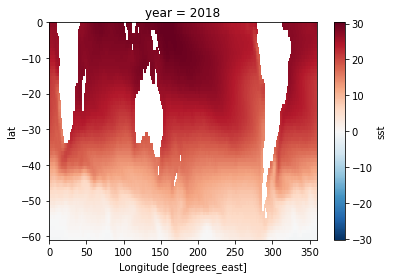

In [65]:
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

sst_annual_means.interp(lat=arange(-60,0,1)).sel(year=2018).plot()

In [44]:
from scipy import stats

sst_SH_slope, sst_SH_intercept, sst_SH_rvalue, sst_SH_pvalue, sst_SH_stderr = stats.linregress(sst_SH.year, sst_SH)

In [48]:
print('p = ' + str(sst_SH_pvalue))

p = 2.7897559437523447e-06


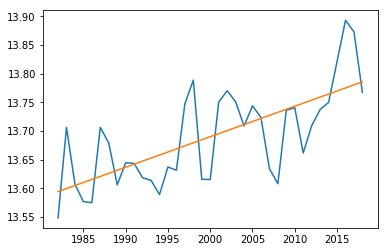

In [54]:
import matplotlib.pyplot as plt

plt.plot(sst_SH.year,sst_SH)

x = [sst_SH.year.isel(year=0), sst_SH.year.isel(year=-1)]

# slope * x + intercept
y = [sst_SH_slope*x[0] + sst_SH_intercept, sst_SH_slope*x[1] + sst_SH_intercept]

plt.plot(x,y)

In [68]:
sst_SH = sst_annual_means.sel(lat=slice(-90,0,-1))
sst_SH

<xarray.DataArray 'sst' (year: 37, lat: 90, lon: 360)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [25.678335, 25.67    , ..., 25.673332, 25.704163],
        [26.094168, 26.0775  , ..., 26.103333, 26.140831]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [25.7025  , 25.755   , ..., 25.599165, 25.655836],
        [26.135834, 26.173334, ..., 26.031668, 26.093332]],

       ...,

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [26.53583 , 26.582499, ..., 26.430834, 26.484167],
        [26.98667 , 27.04083 , ..., 26.880835, 26.9325  ]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [26.612497, 26.589998, ..., 26.557497, 2

In [72]:
sst_Aus = sst_SH.sel(lat=slice(-70,0)).sel(lon=slice(80,180))

year = sst_Aus.year
lat = sst_Aus.lat
lon = sst_Aus.lon

print(np.shape(sst_Aus))
sst_Aus_slope = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='sst_Aus_slope')

sst_Aus_p_value = xr.DataArray(
    np.zeros([np.shape(lat)[0], np.shape(lon)[0]]), 
    dims=('lat', 'lon'), 
    coords=[lat, lon], 
    name='sst_Aus_p_value')

for iid, i in enumerate(lat):
    for jid, j in enumerate(lon):
        sst_Aus_slope[iid, jid], _, _, sst_Aus_p_value[iid, jid], _ = \
        stats.linregress(year, sst_Aus[:, iid, jid])
    print('lat ' + str(np.array(i)))
print(sst_Aus_slope)

(37, 70, 100)
lat -69.5
lat -68.5
lat -67.5
lat -66.5
lat -65.5
lat -64.5
lat -63.5
lat -62.5
lat -61.5
lat -60.5
lat -59.5
lat -58.5
lat -57.5
lat -56.5
lat -55.5
lat -54.5
lat -53.5
lat -52.5
lat -51.5
lat -50.5
lat -49.5
lat -48.5
lat -47.5
lat -46.5
lat -45.5
lat -44.5
lat -43.5
lat -42.5
lat -41.5
lat -40.5
lat -39.5
lat -38.5
lat -37.5
lat -36.5
lat -35.5
lat -34.5
lat -33.5
lat -32.5
lat -31.5
lat -30.5
lat -29.5
lat -28.5
lat -27.5
lat -26.5
lat -25.5
lat -24.5
lat -23.5
lat -22.5
lat -21.5
lat -20.5
lat -19.5
lat -18.5
lat -17.5
lat -16.5
lat -15.5
lat -14.5
lat -13.5
lat -12.5
lat -11.5
lat -10.5
lat -9.5
lat -8.5
lat -7.5
lat -6.5
lat -5.5
lat -4.5
lat -3.5
lat -2.5
lat -1.5
lat -0.5
<xarray.DataArray 'sst_Aus_slope' (lat: 70, lon: 100)>
array([[      nan,       nan,       nan, ..., -0.003859, -0.003666, -0.003619],
       [      nan,       nan,       nan, ..., -0.005104, -0.004988, -0.004936],
       [ 0.00867 ,  0.010723,  0.010877, ..., -0.006904, -0.006732, -0.006617],
 

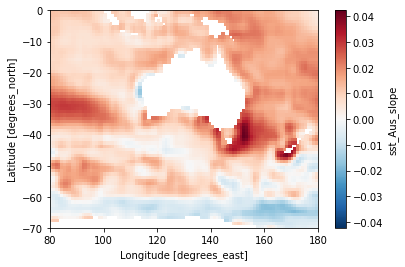

In [73]:
sst_Aus_slope.plot()

In [74]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [76]:
def savefigure(fname):
    output_dir = '/Users/earl/satellite_maps_training/figures/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:5]+fname+'.png'), 
                dpi=300, bbox_inches="tight")

In [83]:
import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.75)

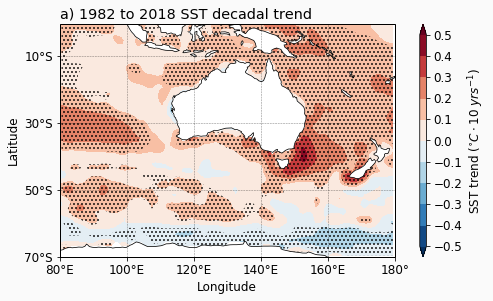

In [92]:
import matplotlib
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(1, figsize=(6,6), facecolor=[0.98,0.98,0.98]) 
matplotlib.rcParams.update({'font.size': 12})

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

levels=arange(-0.5,0.5,0.1)
cmap = plt.cm.RdBu_r
data = sst_Aus_slope * 10
plot = plt.contourf(data.lon, data.lat, data,
            cmap=cmap, levels=levels, extend='both', transform=ccrs.PlateCarree())

# levels2=[0, 0.05]
# data2 = sst_Aus_p_value
# plot2 = plt.contourf(data.lon, data.lat, data2, hatches=['...'],
#             colors='none', levels=levels2, transform=ccrs.PlateCarree())

# ax.set_title('a) 1982 to 2018 SST decadal trend', loc='left')

# ax.set_xticks(arange(80, 180, 20), crs=ccrs.PlateCarree())
# ax.set_yticks(arange(-70, 0, 20), crs=ccrs.PlateCarree())
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax.xaxis.set_major_formatter(lon_formatter)
# ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
# ax.set_ylabel('Latitude')


# ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
# ax.add_feature(land_50m)


# axins = inset_axes(ax,
#                    width="2%",  
#                    height="100%", 
#                    loc='lower left',
#                    bbox_to_anchor=(1.075, 0, 1, 1),
#                    bbox_transform=ax.transAxes,
#                    borderpad=0)
# cbar = plt.colorbar(plot, orientation='vertical',
#                     label=r'SST trend ($^{\circ}C \cdot 10\ yrs^{-1}$)', cax=axins)
# cbar.set_ticks(levels)

# savefigure('SST_trend')